In [1]:
import tensorflow.keras as keras

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
l = 70000

x = np.zeros((l,28,28))
x[:60000,:,:] = x_train
x[60000:,:,:] = x_test

y = np.zeros((l))
y[:60000] = y_train
y[60000:] = y_test

In [5]:
y = y.astype(np.uint8)

In [29]:
import os
from PIL import Image

root_directory = "mnist_classes"

os.makedirs(root_directory, exist_ok=True)

unique_classes = np.unique(y)

for class_label in unique_classes:
    class_directory = os.path.join(root_directory, str(class_label))
    os.makedirs(class_directory, exist_ok=True)

for image, label in zip(x_train, y_train):
    image_filename = f"{label}_{np.random.randint(1e6)}.png"
    image_path = os.path.join(root_directory, str(label), image_filename)
    img = Image.fromarray(image)
    img.save(image_path)



In [6]:
import cv2 as cv
import numpy as np
import os

dir = r"C:\Users\OJAS\RnD\mnist_classes"

def create_dataset(number, features, labels):
    path = os.path.join(dir, number)
    label = number

    for img in os.listdir(path):
        img_path = os.path.join(path, img)

        img_array = cv.imread(img_path)
        img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
        features.append(img_array)
        labels.append(label)

In [7]:
features_0 = []
labels_0 = []

create_dataset(str(0), features_0, labels_0)

In [8]:
features_0 = np.array(features_0)
labels_0 = np.array(labels_0)

features_0 = features_0/255

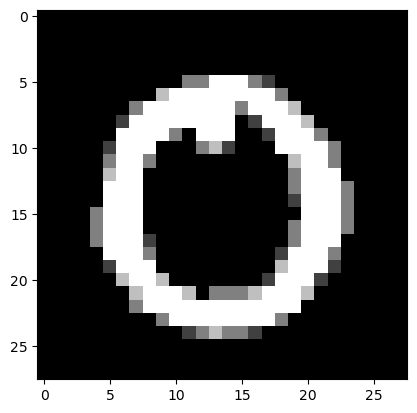

In [9]:
plt.imshow(features_0[5000], cmap='gray')
plt.show()

In [9]:
train_features = features_0[:4000]
test_features = features_0[4000:]

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input

In [11]:
model = Sequential()
model.add(Flatten())
# model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(100, activation='relu'))
# model.add(Dense(500, activation='relu'))
model.add(Dense(28*28, activation='sigmoid'))
model.add(tf.keras.layers.Reshape((28,-1), input_shape=(28*28,)))

# x = Input(shape=(784), name="encoder input")
# en1 = Dense(100, activation='')




In [12]:
from keras.losses import MeanSquaredError
from sklearn.metrics import accuracy_score, classification_report

model.compile(optimizer='adam', loss='MeanSquaredError')

In [13]:
model.fit(train_features, train_features, epochs=100)

Epoch 1/100

125/125 [==============================] - 3s 4ms/step - loss: 0.0691
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0297
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0207
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0194
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 9/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0177
Epoch 10/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0171
Epoch 11/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0167
Epoch 12/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0163
Epoch 13/100

125/125 [==============================] - 1s 4ms/step - loss: 0.0109
Epoch 98/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0109
Epoch 99/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0109
Epoch 100/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0109


In [14]:
model.evaluate(test_features, test_features)

60/60 [==============================] - 1s 3ms/step - loss: 0.0128


0.01280503161251545

In [25]:
comp1 = model.predict(test_features)

comp1 = comp1*255

comp1 = comp1.astype(np.uint8)

60/60 [==============================] - 0s 2ms/step


In [29]:
def plot_images(original, reconstructed, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

    for i in range(rows):
        for j in range(cols):
            if(i==0):           
                index = i * cols + j
                axes[i, j].imshow(original[j], cmap='gray')
                axes[i, j].set_title("Original Image")
                axes[i, j].axis('off')
            else:
                axes[i, j].imshow(reconstructed[j], cmap='gray')
                axes[i, j].set_title("Reconstructed Image")
                axes[i, j].axis('off')

    plt.show()

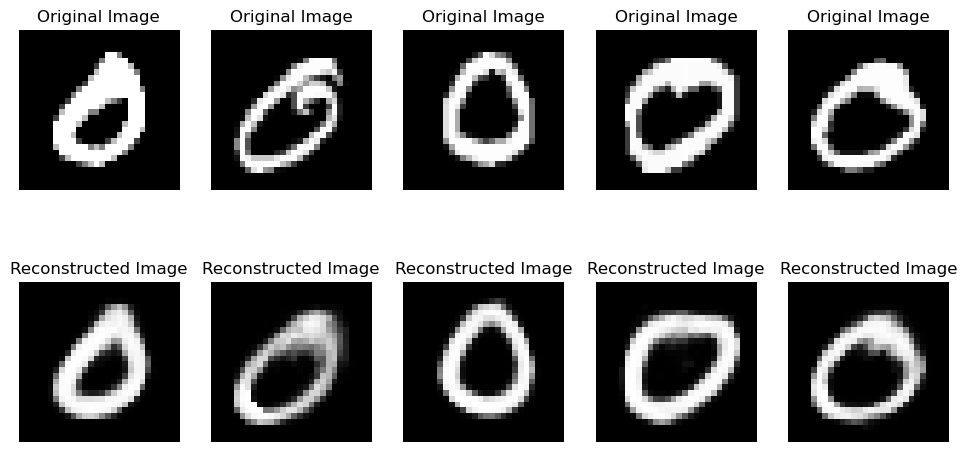

In [30]:
original = test_features[:5]
reconstructed = comp1[:5]

plot_images(original, reconstructed, 2, 5)